Write a program using tensorflow to calculate :
                            y=mx+c
                            
### Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=sum((x-mean(x))^2)/n-1$$
4. Calculate covariance of x & y
    $$covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))/n-1$$
5. Calculate value of m
    $$m = covariance(x,y)/variance(x)$$
6. Calculate value of c
    $$c = mean(y) -m* mean(x)$$
 
 
### Part 2

1. Plot graph for actual values against predicted value
2. Calculate root mean square error.

    

# Solution

## Part 1

In [93]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

with tf.name_scope("Init"):
    arrayX= [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.6, 8.0, 9.68, 10]         #input array for X
    arrayY = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 15, 19, 29, 32]      #input array for Y
    x = tf.constant(arrayX, name='x', dtype=tf.float32)              #tf array for X
    y = tf.constant(arrayY, name='y', dtype=tf.float32)              #tf array for Y

#Mean of X & Y
with tf.name_scope("Mean-X-Y"):
    meanX = tf.reduce_mean(x, [0])
    meanY = tf.reduce_mean(y, [0])

#Variance of X
with tf.name_scope("Variance-X"):
    temp1= tf.subtract(x,meanX)
    temp1= tf.multiply(temp1,temp1)
    temp1= tf.reduce_sum(temp1)
    varianceX= tf.divide(temp1, len(arrayX))
    
if len(arrayX)!=len(arrayY):
    print ("The arrays must be of equal length to find covariance")
    exit
    
#Covariance of X & Y
n= len(arrayX)               #Number of values of x & y
with tf.name_scope("Covariance-X-Y"):
    temp1= tf.subtract(x,meanX)
    temp2= tf.subtract(y,meanY)
    covarianceXY = tf.reduce_sum(tf.multiply(temp1,temp2))
    covarianceXY = tf.divide(covarianceXY, n-1)

#Value of m (Covar(x,y/Var(x))
with tf.name_scope("Val-of-m"):
    m = tf.divide(covarianceXY,varianceX)

#Value of c (Mean(y)−m∗Mean(x))
with tf.name_scope("Val-of-c"):
    c= tf.subtract(meanY,tf.multiply(m,meanX))

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output", sess.graph)
    print("Mean & Variance of X\n\t\t\t\t",sess.run(meanX),"\t", sess.run(varianceX))
    print("Mean of Y\n\t\t\t\t",sess.run(meanY))
    print("Covariance of X & Y\n\t\t\t\t",sess.run(covarianceXY))
    print("Val of m\n\t\t\t\t",sess.run(m))
    print("Val of c\n\t\t\t\t",sess.run(c))
    
    

Mean & Variance of X
				 5.628 	 8.97186
Mean of Y
				 13.7
Covariance of X & Y
				 30.8538
Val of m
				 3.43895
Val of c
				 -5.65442


## Part 2

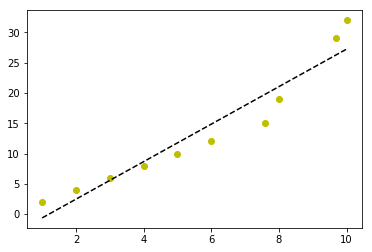

10.602


In [94]:
# Graph

npX= np.asarray(arrayX)
npY= np.asarray(arrayY)

GraphFit= np.polyfit(npX,npY,1)
fitFunc= np.poly1d(GraphFit)      # fitFunc is now a function which takes in x and returns an estimate for y

plt.plot(npX,npY, 'yo', npX, fitFunc(npX), '--k')                       #Source: https://stackoverflow.com/a/6148315
plt.show()


#RMS Error
with tf.name_scope("Root_Mean_Square_error"):    
    rmse= tf.sqrt(tf.reduce_mean(tf.squared_difference(arrayX, arrayY)))      #Source: https://stackoverflow.com/a/43830200
    
    with tf.Session() as sess:
        print(sess.run(rmse))